# Imports

In [1]:
import seaborn as sns
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

2023-12-28 16:46:40.662142: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-28 16:46:40.747613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 16:46:40.747681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 16:46:40.756065: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 16:46:40.788331: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import importlib
import SupportCode.data_loading
import SupportCode.data_processing

importlib.reload(SupportCode.data_loading)
importlib.reload(SupportCode.data_processing)

from SupportCode.data_loading import load_dataset, create_input_space, augment_data
from SupportCode.data_processing import preprocess_signals, plot_signal_samples

In [3]:
data = load_dataset(signal_names=['ecg', 'gsr'])

In [4]:
print(len(data))
print(len(data[0]['signals']['ecg']))

8600
2816


# Preprocessing

In [5]:
data_filtered = preprocess_signals(data, 512, 256)

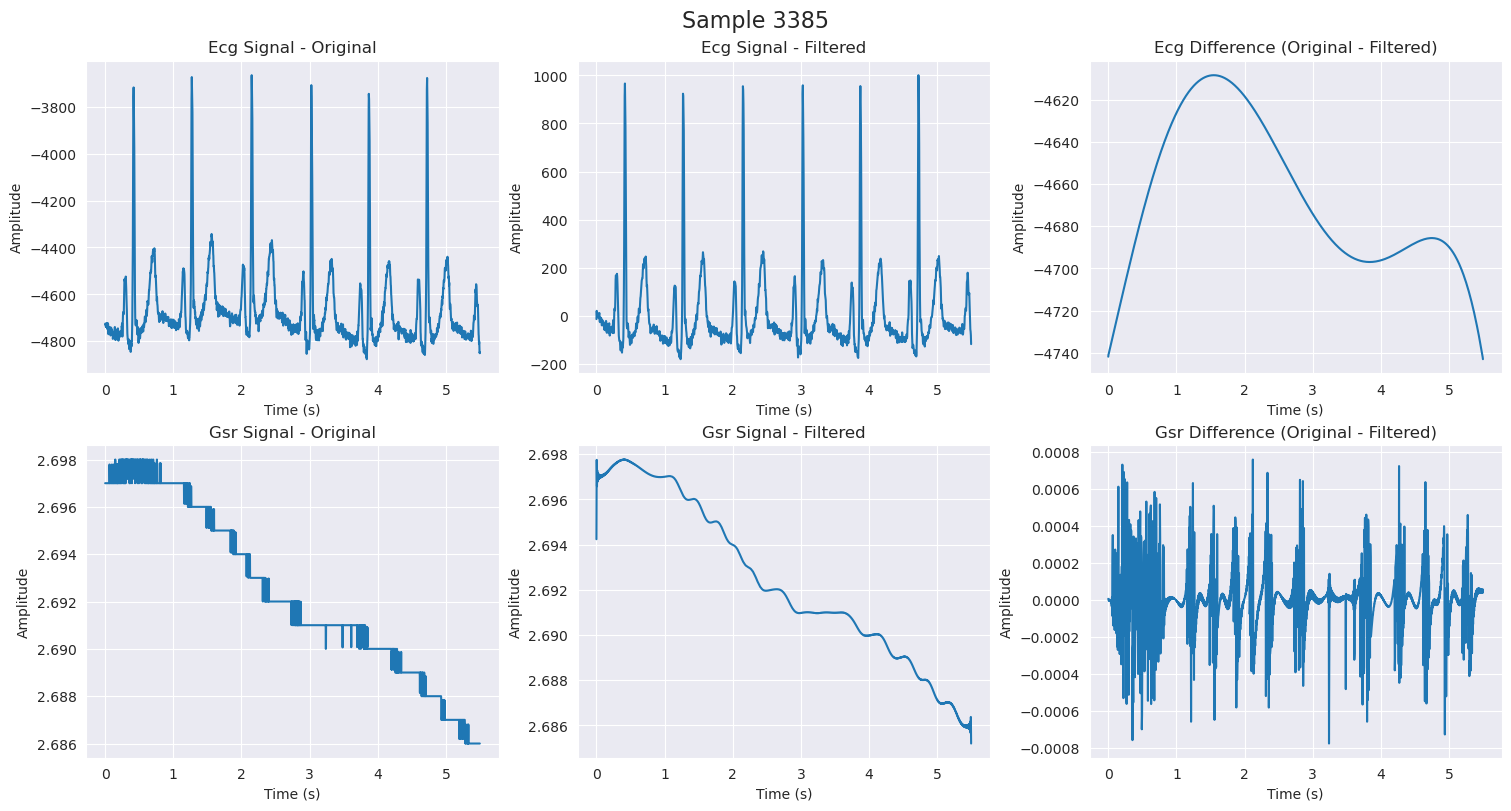

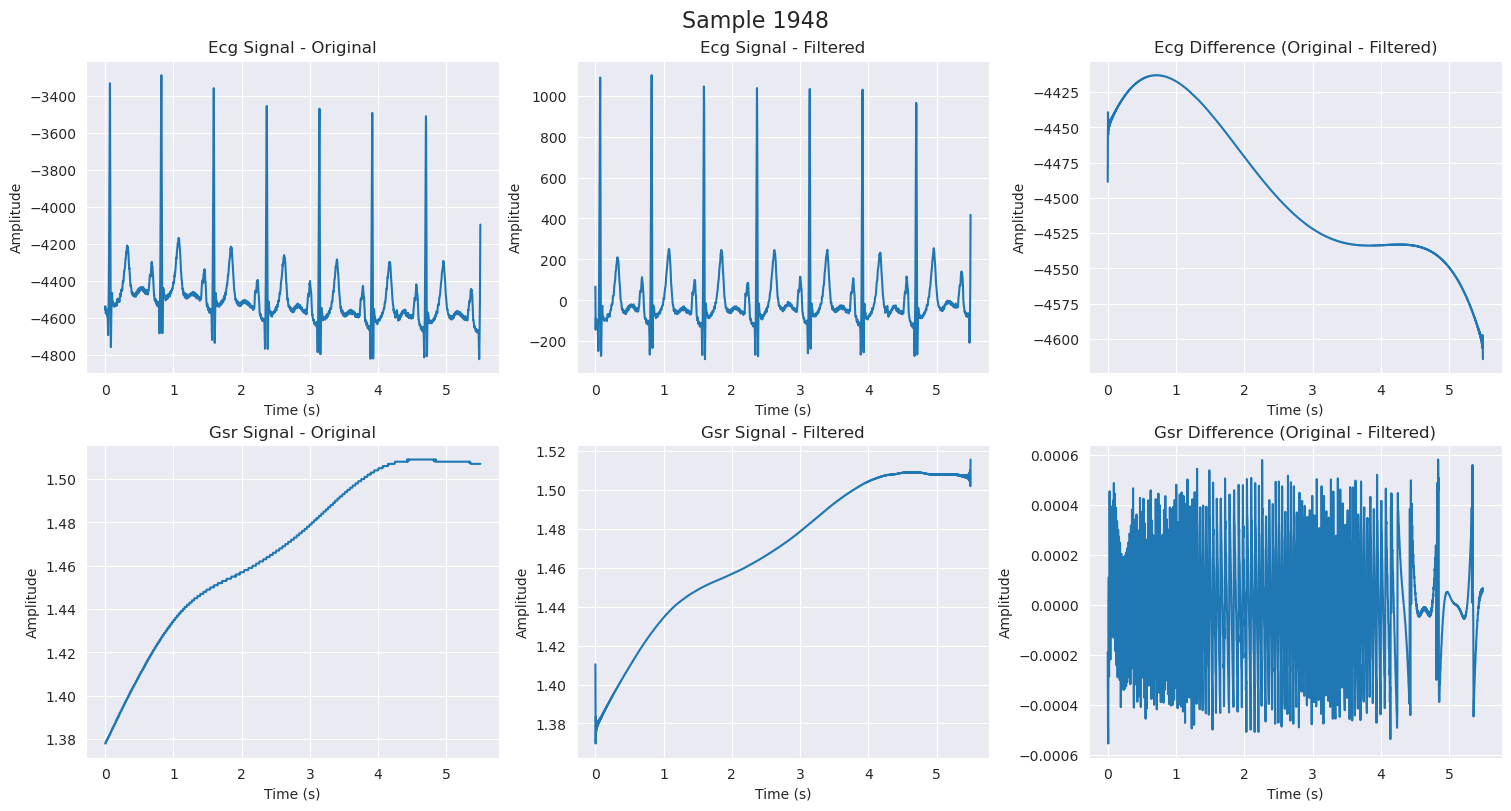

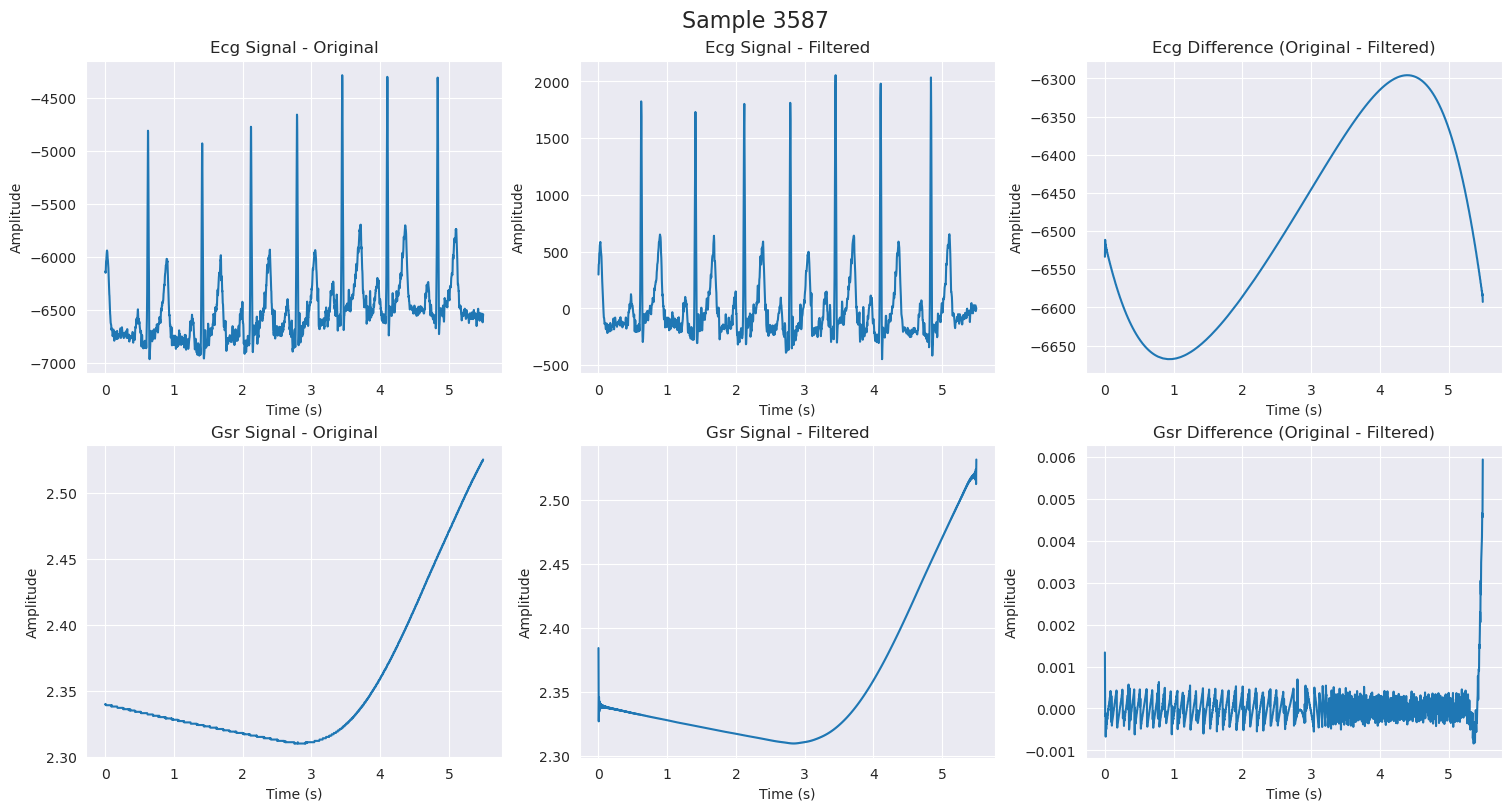

In [6]:
from SupportCode.data_processing import plot_signal_samples
import random

random_indices = random.sample(range(len(data_filtered)), 3)

plot_signal_samples(data, data_filtered, random_indices, 512, 256)

In [15]:
X, y = create_input_space(data_filtered)

X-Shape: (8600, 1408, 2)
y-Shape: (8600,)


In [8]:
def class_balance(y):
    unique, counts = np.unique(y, return_counts=True)
    class_balance = dict(zip(unique, counts))
    
    print("Class Balance:")
    for class_label, count in class_balance.items():
        print(f"Class {class_label}: {count} samples")

In [9]:
class_balance(y)

Class Balance:
Class 0: 1720 samples
Class 1: 1720 samples
Class 2: 1720 samples
Class 3: 1720 samples
Class 4: 1720 samples


In [10]:
augmented_X, augmented_y = augment_data(X, y)

Augmented X.shape: (43000, 1152, 2)
Augmented y.shape: (43000,)


In [11]:
class_balance(augmented_y)

Class Balance:
Class 0: 8600 samples
Class 1: 8600 samples
Class 2: 8600 samples
Class 3: 8600 samples
Class 4: 8600 samples


In [12]:
import matplotlib.pyplot as plt

def plot_signals(original_X, augmented_X, original_y, augmented_y, sample_indices, signal_index=0):
    """
    Plot original and augmented signals for comparison.

    Args:
    - original_X (np.array): Original data array.
    - augmented_X (np.array): Augmented data array.
    - original_y (np.array): Original labels array.
    - augmented_y (np.array): Augmented labels array.
    - sample_indices (list): Indices of the samples to be plotted.
    - signal_index (int): Index of the signal to be plotted in case of multi-signal data.
    """

    num_plots = len(sample_indices)
    plt.figure(figsize=(15, 4 * num_plots))

    for i, idx in enumerate(sample_indices, start=1):
        # Plot original signal
        plt.subplot(num_plots, 2, 2 * i - 1)
        plt.plot(original_X[idx, :, signal_index], label=f"Original - Class {original_y[idx]}")
        plt.title(f"Original Signal {idx}")
        plt.xlabel("Timepoints")
        plt.ylabel("Signal Amplitude")
        plt.legend()

        # Plot augmented signal
        plt.subplot(num_plots, 2, 2 * i)
        plt.plot(augmented_X[idx, :, signal_index], label=f"Augmented - Class {augmented_y[idx]}")
        plt.title(f"Augmented Signal {idx}")
        plt.xlabel("Timepoints")
        plt.ylabel("Signal Amplitude")
        plt.legend()

    plt.tight_layout()
    plt.show()

In [13]:
from SupportCode.pipeline import loading_pipeline

X_train, y_train, X_test, y_test = loading_pipeline()

Number of samples: 8600
Signal Length: 2816
X-Shape: (8100, 1408, 2)
y-Shape: (8100,)
X-Shape: (500, 1408, 2)
y-Shape: (500,)
Augmented X.shape: (40500, 1152, 2)
Augmented y.shape: (40500,)
Trimmed X.shape: (500, 1152, 2)


In [14]:
class_balance(y_test)

Class Balance:
Class 0: 100 samples
Class 1: 100 samples
Class 2: 100 samples
Class 3: 100 samples
Class 4: 100 samples
